In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import polyval, polyfit, sqrt, stats, randn
from matplotlib.patches import Rectangle

In [2]:
# constants
c = 3 * 10 **8
h = 6.62607*10**-34
e = 1.6 * 10 **-19
k = 1.3806*10**-23
ϵ0 = 8.854 * 10 **-12
me = 0.511 / c**2
mp = 938 / c**2
N_A = 6.022 * 10 **23
m_α = 3727.379 / c**2
W_air = 85.7 * 10 **-6
W_He = 41.8 * 10 **-6
W_Ar = 187 * 10 **-6
Z_α = 2
Ekin_α = 5.486
k_b = 1.38 * 10 **-23
k_air = 14.4
k_He = 2
k_Ar = 18
# MeV/J
MeV_J = 1/e * 10**-6

In [3]:
#functions
def gauss(x, a, x0, sigma,b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+b;
def g(x,a,b):
    return a*x+b;

def planck(l,T,a,b):
    #f = c/(l*10**-6);
    l=l*10**-6
    return a*8*np.pi*h*c/l**5/((np.exp(h*(c/l)/(k*T))-1))+b

In [4]:
#reading acquired data

#day 1

#calibration
lFilter=[1.34,1.69,1.90,2.12,2.47,4.66];
stepsCal=[]
intensityCal=[]
for a in range(6):
    input = 'Data/filter'+str(a+1)+'.txt'
    ste=[];
    inte=[];
    for line in open(input):
            line = line.replace("\n","")
            line = line.replace(",",".")
            d = line.split("\t")
            ste.append(float(d[0]))
            inte.append(float(d[1]))
    intensityCal.append(inte); 
    stepsCal.append(ste);

    
#temperature
T=[798,752,698,646,600];
ΔT=2;
stepsTemp=[]
intensityTemp=[]
for temp in T:
    input = 'Data/'+str(temp)+'.txt'
    ste=[];
    inte=[];
    for line in open(input):
            line = line.replace("\n","")
            line = line.replace(",",".")
            d = line.split("\t")
            ste.append(float(d[0]))
            inte.append(float(d[1]))
    intensityTemp.append(inte); 
    stepsTemp.append(ste);
T=[x+273 for x in T] # temperature in Kelvin

intensityTemp[0] = [x*3 for x in intensityTemp[0] ]
intensityTemp[1] = [x*3 for x in intensityTemp[1] ]
    
#day 2
pres=[]
stepsPres=[]
intensityPres=[]



<h1>day 1</h1>
<br>
<h2>calibration fit</h2>

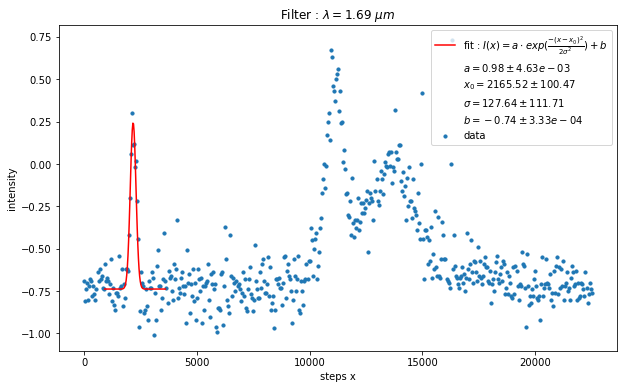

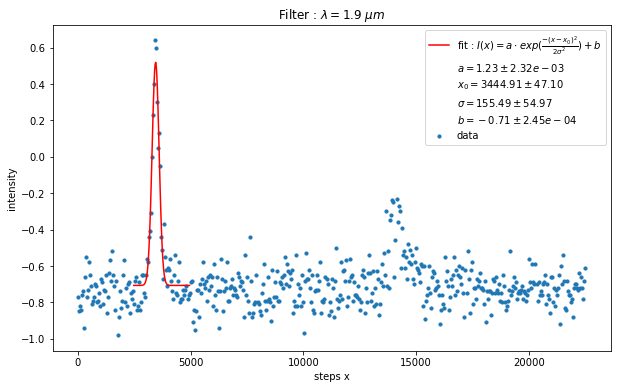

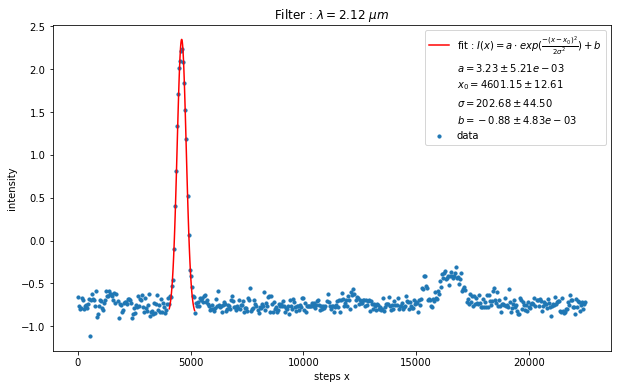

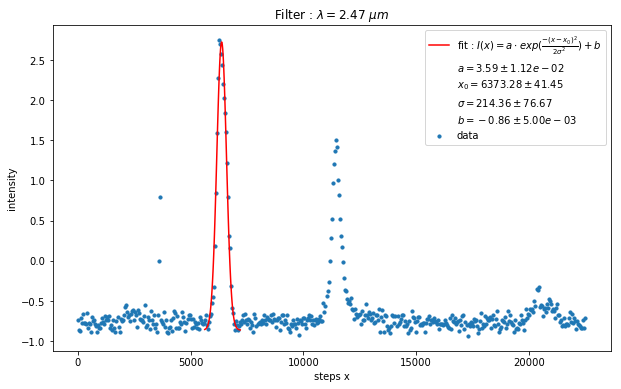

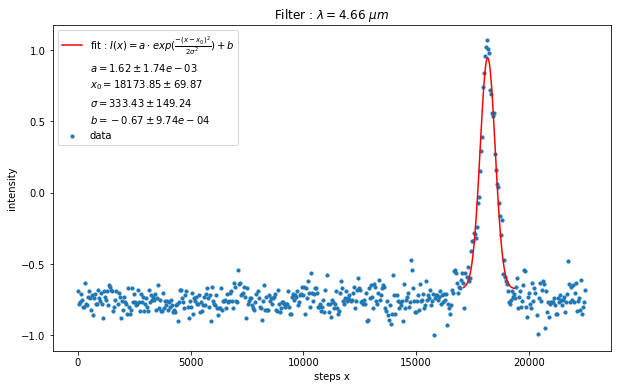

In [17]:
stepsMax=[]
ΔstepsMax=[]

#calibration
s=[x for x in stepsCal]
I=[x for x in intensityCal]

#fit region
reg = [[1,2],[20,80],[55,110],[90,115],[125,160],[380,430]]

#gaussian fits
for i in range(1,6):
    t=np.linspace(s[i][reg[i][0]],s[i][reg[i][1]],100)
    s[i] = s[i][reg[i][0]:reg[i][1]]
    I[i] = I[i][reg[i][0]:reg[i][1]]
    x0Initial = 45*(reg[i][1]+reg[i][0])/2
    popt, pcov = curve_fit(gauss,s[i],I[i],p0=[3,x0Initial,100,-1])
    stepsMax.append(popt[1])
    ΔstepsMax.append(np.diag(pcov)[1])
    #plotting
    fig,ax = plt.subplots(figsize=(10,6))
    ax.scatter(stepsCal[i],intensityCal[i],s=10,label="data")
    ax.plot(t,gauss(t,*popt),c="red", label=r"fit : $I(x)=a\cdot exp(\frac{-(x-x_0)^2}{2\sigma^2})+b$")
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$a = %0.2f \pm %0.2e$"%(popt[0],np.diag(pcov)[0]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$x_0 = %0.2f \pm %0.2f$"%(popt[1],np.diag(pcov)[1]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$\sigma = %0.2f \pm %0.2f$"%(popt[2],np.diag(pcov)[2]))
    ax.plot(t[0],gauss(t[0],*popt),lw=0,label="$b = %0.2f \pm %0.2e$"%(popt[3],np.diag(pcov)[3]))
    ax.set_xlabel("steps x")
    ax.set_ylabel("intensity")
    ax.set_title("Filter : $\lambda = $"+str(lFilter[i])+" $\mu m$")
    ax.legend(loc="best")
    fig.savefig("f"+str(lFilter[i])+".pdf")
    


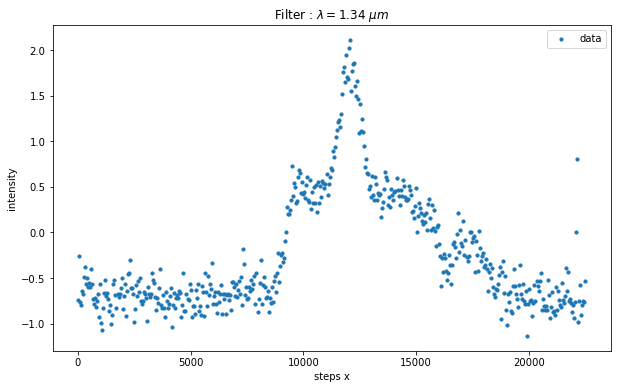

In [15]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(stepsCal[0],intensityCal[0],s=10,label="data")
ax.set_xlabel("steps x")
ax.set_ylabel("intensity")
ax.set_title("Filter : $\lambda = $"+str(lFilter[0])+" $\mu m$")
ax.legend(loc="best")
fig.savefig("f1.34.pdf")

[1.69, 1.9, 2.12, 2.47, 4.66]

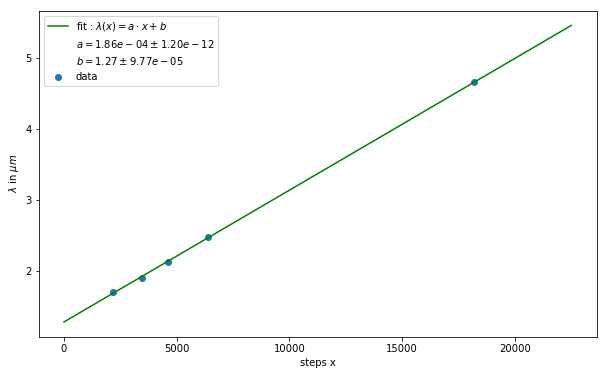

In [46]:
#linear fit of steps and wavelength
popt,pcov = curve_fit(g,stepsMax,lFilter[1:])
a=popt[0]
Δa=np.diag(pcov)[0]
b=popt[1]
Δb=np.diag(pcov)[1]

t=np.linspace(0,22500,100)
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(stepsMax,lFilter[1:],label="data")
ax.plot(t,g(t,a,b),c="g",label="fit : $\lambda(x) = a \cdot x + b$")
ax.set_xlabel("steps x")
ax.set_ylabel("$\lambda$ in $\mu m$")
ax.plot(t[0],g(t[0],*popt),lw=0,label="$a = %0.2e \pm %0.2e$"%(popt[0],np.diag(pcov)[0]))
ax.plot(t[0],g(t[0],*popt),lw=0,label="$b= %0.2f \pm %0.2e$"%(popt[1],np.diag(pcov)[1]))
ax.legend(loc="best")
fig.savefig("cal.pdf")

lFilter[1:]

In [7]:
#calculate the wavelength for a given step
def wl(step):
    return a*step+b;
def Δwl(step):
    return np.sqrt((Δa*step)**2+(Δb)**2)

[1064.2516704410737,
 1024.8697920881903,
 980.61138773190521,
 947.46615961530517,
 914.26957332908216]

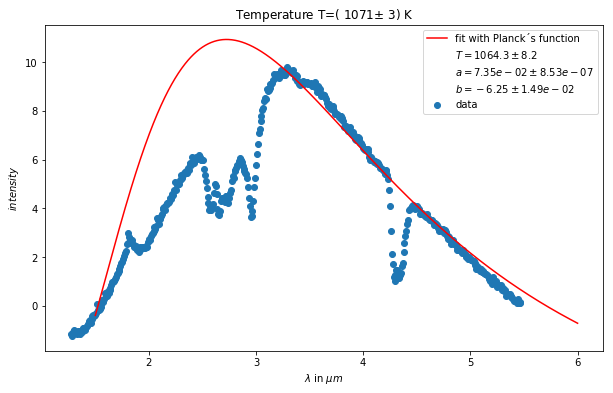

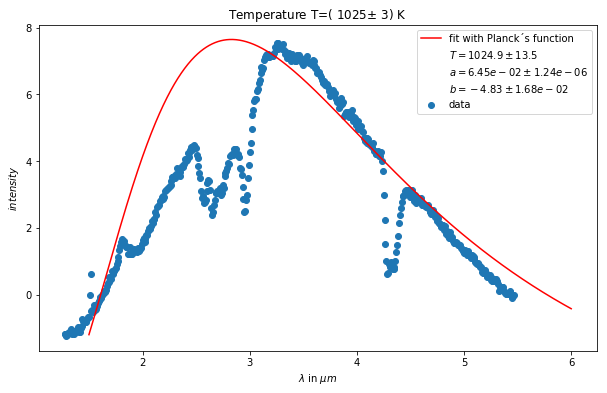

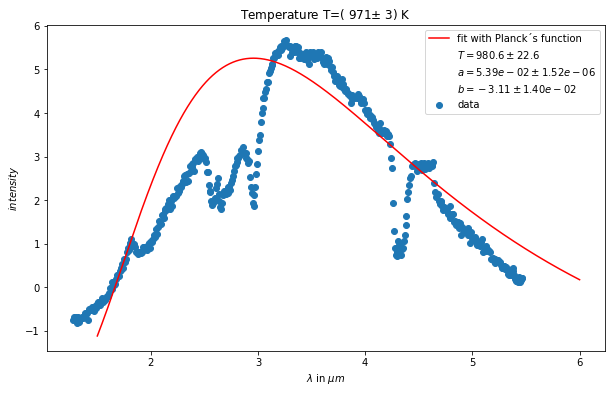

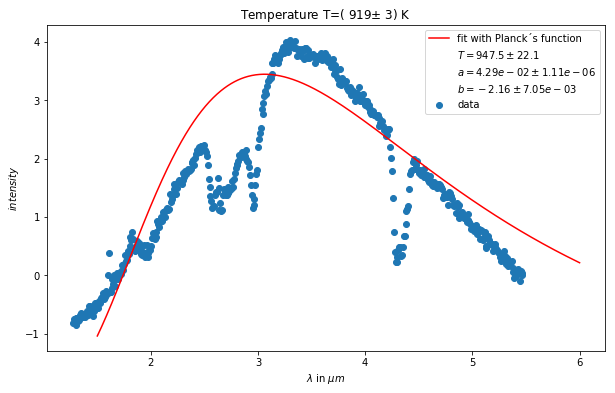

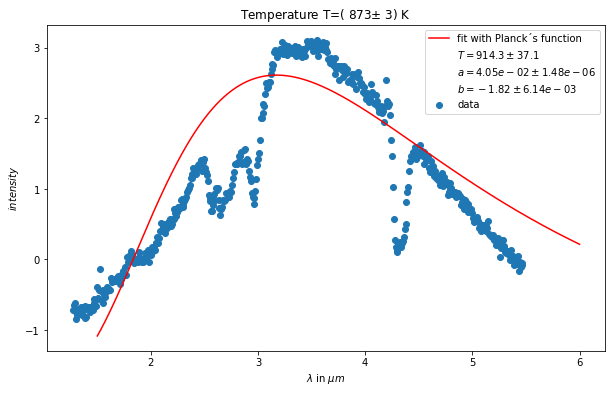

In [36]:
#Fitting the planck law

n = [[57,235,350,380],[80,235,350,380],[100,235,350,380],[130,235,350,380],[130,230,350,420]]

λMax = []
λTemp = []
Tfit = []
ΔTfit = []

for i in range(5):
    λ = [wl(x) for x in stepsTemp[i]]
    λTemp.append(λ)
    λFit  = λ[:n[i][0]]+λ[n[i][1]:n[i][2]]+λ[n[i][3]:]
    intensityTempFit = intensityTemp[i][:n[i][0]]+intensityTemp[i][n[i][1]:n[i][2]]+intensityTemp[i][n[i][3]:]
    popt, pcov = curve_fit(planck,λFit,intensityTempFit,p0=(900,0.04,-0.5))
    Tfit.append(popt[0])
    ΔTfit.append(np.diag(pcov)[0])
    
    t=np.linspace(1.5,6,1000)
    fig,ax = plt.subplots(figsize=(10,6))
    ax.scatter(λTemp[i],intensityTemp[i],label="data")
    #ax.scatter(λTemp[i][n1],intensityTemp[i][n1],c="r")
    #ax.scatter(λTemp[i][n2],intensityTemp[i][n2],c="r")
    #ax.scatter(λTemp[i][n3],intensityTemp[i][n3],c="r")
    #ax.scatter(λTemp[i][n4],intensityTemp[i][n4],c="r")
    ax.plot(t,planck(t,*popt),c="r", label="fit with Planck´s function")
    ax.plot(λTemp[i][0],intensityTemp[i][0],lw=0,label="$T = %0.1f \pm %0.1f$"%(popt[0],np.diag(pcov)[0]))
    ax.plot(λTemp[i][0],intensityTemp[i][0],lw=0,label="$a = %0.2e \pm %0.2e$"%(popt[1],np.diag(pcov)[1]))
    ax.plot(λTemp[i][0],intensityTemp[i][0],lw=0,label="$b= %0.2f \pm %0.2e$"%(popt[2],np.diag(pcov)[2]))
    ax.set_xlabel("$\lambda$ in $\mu m$")
    ax.set_ylabel("$intensity$")
    ax.set_title("Temperature T=( "+str(T[i])+"$\pm$ 3) K ")
    ax.legend(loc="best")
    #max of curve
    m = np.array(planck(t,*popt))
    lmax = t[np.where(m==max(m))]
    λMax.append(lmax)
    fig.savefig("T"+str(T[i])+".pdf")
    
Tfit

array([ 0.01743617,  0.01903629,  0.02121248,  0.02368094,  0.02624228])

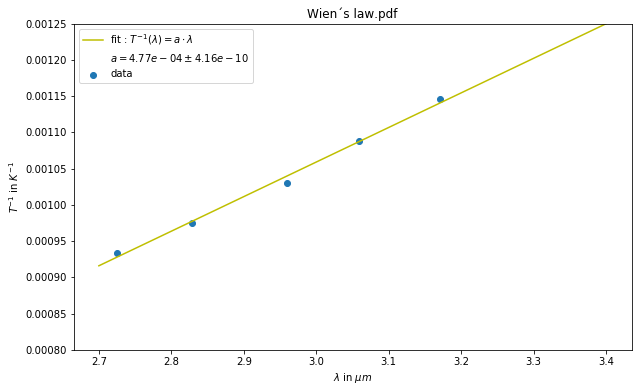

In [55]:

lMax = [x[0] for x in λMax]

#Wien´s law
TI= [1/t for t in T]
ΔTI = [ΔT/t**2 for t in T]
popt,pcov = curve_fit(g,np.array(lMax),np.array(TI))
t = np.linspace(2.7,3.4,100)
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(λMax,TI,label="data")
ax.errorbar(λMax,TI,yerr=ΔTI,lw=0)
ax.plot(t,g(t,*popt),c="y",label="fit : $T^{-1}(\lambda) = a \cdot \lambda $")
ax.plot(λMax,TI,lw=0,label="$a = %0.2e \pm %0.2e$"%(popt[0],np.diag(pcov)[0]))
ax.set_ylim((0.0008,0.00125))
ax.set_xlabel("$\lambda$ in $\mu m$")
ax.set_ylabel(r"$T^{-1}$ in $K^{-1}$")
ax.set_title("Wien´s law.pdf")
ax.legend(loc="best")
fig.savefig("wien.pdf")

np.array(ΔTI)*10**4

In [10]:
#stefan boltzman law
stepsize = 45
deltaLambda = wl(stepsize)
P = []
for i in range(5):
        p = sum([(x+1)*deltaLambda for x in intensityTemp[i]])/22500
        P.append(p)

[ 0.14952722  0.11623274  0.0962531   0.07457011  0.06139187]
[ 0.00245696  0.00215378  0.001831    0.0015523   0.00133068]


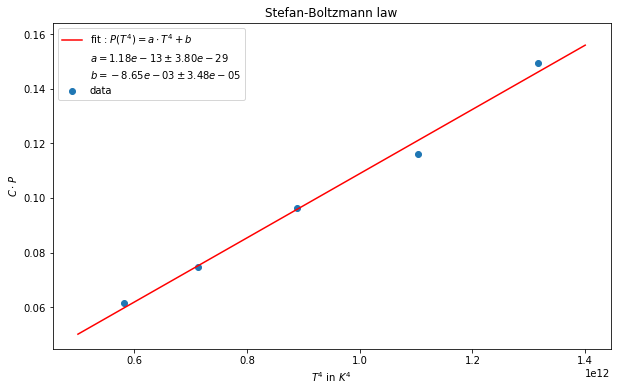

In [65]:
#P0 und P1 sind anders skaliert als die restlichen um einen faktor von ca 1/2


T4= [t**4 for t in T][:5]
ΔT4 = [ΔT*t**3 for t in T][:5]

popt,pcov = curve_fit(g,np.array(T4),np.array(P[:5]))

fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(T4,P[:5],label="data")
ax.errorbar(T4,P[:5],xerr=ΔT4,lw=0)
t = np.linspace(0.5e12,1.4e12,100)
ax.plot(t,g(t,*popt),c="r",label="fit : $P(T^{4}) = a \cdot T^{4} +b $")
ax.plot(T4,P[:5],lw=0,label="$a = %0.2e \pm %0.2e$"%(popt[0],np.diag(pcov)[0]))
ax.plot(T4,P[:5],lw=0,label="$b = %0.2e \pm %0.2e$"%(popt[1],np.diag(pcov)[1]))
ax.set_ylabel("$C\cdot P$")
ax.set_xlabel(r"$T^{4}$ in $K^{4}$")
ax.legend(loc="best")
ax.set_title("Stefan-Boltzmann law")
fig.savefig("sb.pdf")

print(np.array(P))
print(np.array(ΔT4)*10**-12)